In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.graph_objects as go

In [2]:
hs = pd.read_csv('hospital.csv')
hs

,provider_id,hospital_name,address,city,state,zip_code,county_name,Country,phone_number,hospital_type,hospital_ownership,emergency_services,meets_criteria_for_meaningful_use_of_ehrs
0,31309,SAGE MEMORIAL HOSPITAL,STATE ROUTE 264 SOUTH 191,GANADO,AZ,86505,APACHE,USA,(928) 755-4541,Critical Access Hospitals,Voluntary non-profit - Private,False,False
1,44021,WOODRIDGE BEHAVIORAL CENTER,600 NORTH 7TH STREET,WEST MEMPHIS,AR,72301,CRITTENDEN,USA,(870) 394-4113,Psychiatric,Proprietary,False,False
2,100277,DOUGLAS GARDENS HOSPITAL,5200 NE 2ND AVE,MIAMI,FL,33137,MIAMI-DADE,USA,(305) 751-8626,Acute Care Hospitals,Voluntary non-profit - Private,False,False
3,104078,SUNCOAST BEHAVIORAL HEALTH CENTER,4480 51ST ST W,BRADENTON,FL,34210,MANATEE,USA,(941) 792-2222,Psychiatric,Proprietary,False,False
4,130063,TREASURE VALLEY HOSPITAL,8800 WEST EMERALD STREET,BOISE,ID,83704,ADA,USA,(208) 373-5000,Acute Care Hospitals,Proprietary,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,490075,SOVAH HEALTH DANVILLE,142 SOUTH MAIN STREET,DANVILLE,VA,24541,DANVILLE CITY,USA,(434) 799-2100,Acute Care Hospitals,Proprietary,True,True
1996,100040,ASCENSION ST VINCENT'S RIVERSIDE,1 SHIRCLIFF WAY,JACKSONVILLE,FL,32204,DUVAL,USA,(904) 308-7300,Acute Care Hospitals,Voluntary non-profit - Private,True,True
1997,141309,ADVOCATE EUREKA HOSPITAL,101 S MAJOR ST,EUREKA,IL,61530,WOODFORD,USA,(309) 467-2371,Critical Access Hospitals,Voluntary non-profit - Private,True,True
1998,431329,SANFORD CHAMBERLAIN MEDICAL CENTER,300 S BYRON,CHAMBERLAIN,SD,57325,BRULE,USA,(605) 234-5511,Critical Access Hospitals,Voluntary non-profit - Private,True,True


In [3]:
hs.isna().sum()

provider_id                                  0
hospital_name                                0
address                                      0
city                                         0
state                                        0
zip_code                                     0
county_name                                  0
Country                                      0
phone_number                                 0
hospital_type                                0
hospital_ownership                           0
emergency_services                           0
meets_criteria_for_meaningful_use_of_ehrs    0
dtype: int64

In [4]:
hs.dtypes

provider_id                                  object
hospital_name                                object
address                                      object
city                                         object
state                                        object
zip_code                                      int64
county_name                                  object
Country                                      object
phone_number                                 object
hospital_type                                object
hospital_ownership                           object
emergency_services                             bool
meets_criteria_for_meaningful_use_of_ehrs      bool
dtype: object

In [5]:
hs["hospital_name"] = hs["hospital_name"].astype('category')
hs["hospital_name"] = hs["hospital_name"].cat.codes
hs['hospital_name']

0       1454
1       1954
2        506
3       1708
4       1780
        ... 
1995    1595
1996      87
1997      36
1998    1496
1999    1554
Name: hospital_name, Length: 2000, dtype: int16

In [6]:
hs["emergency_services"] = hs["emergency_services"].astype('category')
hs["emergency_services"] = hs["emergency_services"].cat.codes
hs['emergency_services']

0       0
1       0
2       0
3       0
4       0
       ..
1995    1
1996    1
1997    1
1998    1
1999    1
Name: emergency_services, Length: 2000, dtype: int8

In [7]:
hs["Country"] = hs["Country"].astype('category')
hs["Country"] = hs["Country"].cat.codes
hs['Country']

0       0
1       0
2       0
3       0
4       0
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: Country, Length: 2000, dtype: int8

In [8]:
hs

,provider_id,hospital_name,address,city,state,zip_code,county_name,Country,phone_number,hospital_type,hospital_ownership,emergency_services,meets_criteria_for_meaningful_use_of_ehrs
0,31309,1454,STATE ROUTE 264 SOUTH 191,GANADO,AZ,86505,APACHE,0,(928) 755-4541,Critical Access Hospitals,Voluntary non-profit - Private,0,False
1,44021,1954,600 NORTH 7TH STREET,WEST MEMPHIS,AR,72301,CRITTENDEN,0,(870) 394-4113,Psychiatric,Proprietary,0,False
2,100277,506,5200 NE 2ND AVE,MIAMI,FL,33137,MIAMI-DADE,0,(305) 751-8626,Acute Care Hospitals,Voluntary non-profit - Private,0,False
3,104078,1708,4480 51ST ST W,BRADENTON,FL,34210,MANATEE,0,(941) 792-2222,Psychiatric,Proprietary,0,False
4,130063,1780,8800 WEST EMERALD STREET,BOISE,ID,83704,ADA,0,(208) 373-5000,Acute Care Hospitals,Proprietary,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,490075,1595,142 SOUTH MAIN STREET,DANVILLE,VA,24541,DANVILLE CITY,0,(434) 799-2100,Acute Care Hospitals,Proprietary,1,True
1996,100040,87,1 SHIRCLIFF WAY,JACKSONVILLE,FL,32204,DUVAL,0,(904) 308-7300,Acute Care Hospitals,Voluntary non-profit - Private,1,True
1997,141309,36,101 S MAJOR ST,EUREKA,IL,61530,WOODFORD,0,(309) 467-2371,Critical Access Hospitals,Voluntary non-profit - Private,1,True
1998,431329,1496,300 S BYRON,CHAMBERLAIN,SD,57325,BRULE,0,(605) 234-5511,Critical Access Hospitals,Voluntary non-profit - Private,1,True


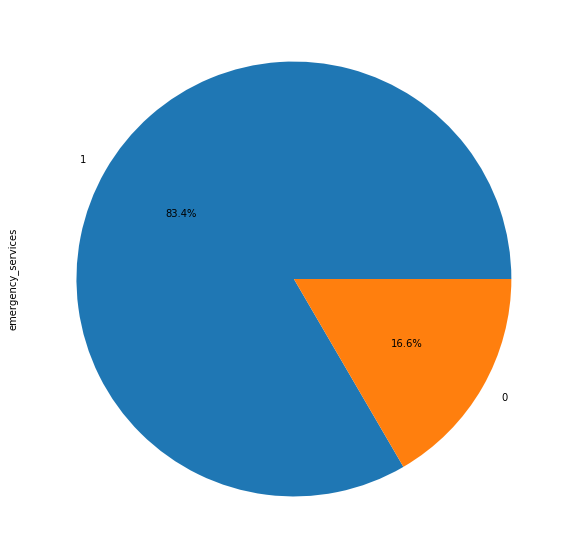

In [11]:
plt.figure(figsize=(20,10))
hs['emergency_services'].value_counts().plot.pie(autopct="%1.1f%%")
colors = ['yellowgreen', 'gold']